# Redes Neuronales

Construcción de redes neuronales con PyTorch. Pytorch tiene muchas funciones que son muy útiles para construir redes neuronales. Las redes se construyen apilando capas, y esto se puede realizar de manera muy simple.

El módulo torch.nn tiene una gran variedad de capas y funciones de activación que serán de gran utilidad. También se pueden construir capas con operaciones personalizadas, pero escapa a los alcances de este curso.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Un modelo de red neuronal se puede hacer mediante una función o crear objetos de clase con algunos métodos definidos por defecto. Veremos esta última forma, ya que es más versatil

In [2]:
class Modelo(torch.nn.Module):  # Los objetos de esta clase se construyen a partir de la clase Module (herencia)
    def __init__(self, n_in, n_hidden, n_out) -> None:
        super().__init__() # para heredar los atributos de la clase madre
        self.lineal1 = torch.nn.Linear(n_in, n_hidden) # Capa de entrada
        self.activation1 = torch.nn.ReLU()  # funcion de activacion sobre la 
        self.lineal2 = torch.nn.Linear(n_hidden, n_out) # Capa oculta
    
    def forward(self, x):
        self.x1 = self.lineal1(x)
        self.x2 = self.activation1(self.x1)
        self.x3 = self.lineal2(self.x2)
        return self.x3

In [4]:
modelo = Modelo(5,3,1)
print(modelo)

Modelo(
  (lineal1): Linear(in_features=5, out_features=3, bias=True)
  (activation1): ReLU()
  (lineal2): Linear(in_features=3, out_features=1, bias=True)
)


In [7]:
print('Parametros del modelo:')
print('----------------------')
for par in modelo.parameters():
    print(par)
print('-----------------------')

Parametros del modelo:
----------------------
Parameter containing:
tensor([[ 0.4273, -0.1990,  0.4058, -0.0130,  0.3862],
        [ 0.2005,  0.3404, -0.1039, -0.3229, -0.0279],
        [ 0.2178,  0.3728, -0.0186, -0.0788, -0.3939]], requires_grad=True)
Parameter containing:
tensor([0.2882, 0.3920, 0.3119], requires_grad=True)
Parameter containing:
tensor([[ 0.2405, -0.1017, -0.0944]], requires_grad=True)
Parameter containing:
tensor([0.4504], requires_grad=True)
-----------------------


In [8]:
print('parametros de una capa:')
print('-----------------------')
for par in modelo.lineal1.parameters():
    print(par)

parametros de una capa:
-----------------------
Parameter containing:
tensor([[ 0.4273, -0.1990,  0.4058, -0.0130,  0.3862],
        [ 0.2005,  0.3404, -0.1039, -0.3229, -0.0279],
        [ 0.2178,  0.3728, -0.0186, -0.0788, -0.3939]], requires_grad=True)
Parameter containing:
tensor([0.2882, 0.3920, 0.3119], requires_grad=True)


In [11]:
inp = torch.ones(5)*-1
modelo.forward(inp)
print('flujo de los tensores')
print('---------------------')
print(f'entrada: {inp}')
print(f'salida de la primera capa lineal: {modelo.x1}')
print(f'salida de la capa de activacion: {modelo.x2}')
print(f'salida de la capa oculta: {modelo.x3}')

flujo de los tensores
---------------------
entrada: tensor([-1., -1., -1., -1., -1.])
salida de la primera capa lineal: tensor([-0.7190,  0.3058,  0.2126], grad_fn=<ViewBackward0>)
salida de la capa de activacion: tensor([0.0000, 0.3058, 0.2126], grad_fn=<ReluBackward0>)
salida de la capa oculta: tensor([0.3993], grad_fn=<ViewBackward0>)


## Regresion lineal

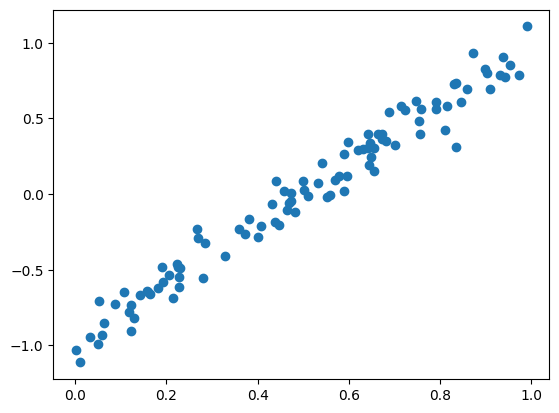

In [12]:
# creamos un dataset sintetico simple
a_true = 2   
b_true = -1
rng = np.random.default_rng()
x = rng.uniform(0,1,100)    # nuestra variable (feature)
y = a_true *x + b_true + rng.normal(0,0.1, 100)   # los valores a ajustar son una recta
plt.scatter(x,y)

In [13]:
class LinReg(torch.nn.Module):
    def __init__(self) -> None:
        super(LinReg, self).__init__()
        self.linear = torch.nn.Linear(1,1)
    
    def forward(self, x):
        return self.linear(x)

regresor = LinReg()
print(f'modelo \n {regresor}')
for p in regresor.parameters():
    print(p)

modelo 
 LinReg(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Parameter containing:
tensor([[0.5250]], requires_grad=True)
Parameter containing:
tensor([0.8887], requires_grad=True)


In [14]:
# para entrenar el modelo necesitamos definir una funcion de perdida 
perdida = torch.nn.MSELoss(reduction='mean') # Usamos la misma que en el tema anterior

In [15]:
# convertimos a tensores los puntos 
x_train = torch.from_numpy(x).float().view(-1,1) # hacemos un vector columna
y_train = torch.from_numpy(y).float().view(-1,1) # hacemos un vector columna

In [16]:
# Entrenamiento
history = {'loss':[], 'parameters': []}
lr = 0.2
for epoch in range(100):  # loop over the dataset multiple times
    y_pred = regresor(x_train)      # Calculo los valores que predice el modelo
    loss = perdida(y_pred, y_train) # calculo el loss para esos valores
    history['loss'].append(loss.item())     # guardo la historia para dibujar
    history['parameters'].append([p.item() for p  in regresor.parameters()])

    # IMPORTANTE!! pongo en cero todos los gradientes del modelo
    regresor.zero_grad()           
    # derivo respecto de los parametros con autograd
    loss.backward()

    # Actualizamos en descenso por gradiente
    with torch.no_grad():
        for p in regresor.parameters():
            p -= lr*p.grad
    if epoch %10 ==0:
        print(f'epoch: {epoch}/100 ---> loss: {loss}')

epoch: 0/100 ---> loss: 1.4823683500289917
epoch: 10/100 ---> loss: 0.17766046524047852
epoch: 20/100 ---> loss: 0.11276768893003464
epoch: 30/100 ---> loss: 0.07293669879436493
epoch: 40/100 ---> loss: 0.04848821088671684
epoch: 50/100 ---> loss: 0.03348160535097122
epoch: 60/100 ---> loss: 0.024270467460155487
epoch: 70/100 ---> loss: 0.01861661672592163
epoch: 80/100 ---> loss: 0.01514626294374466
epoch: 90/100 ---> loss: 0.013016137294471264


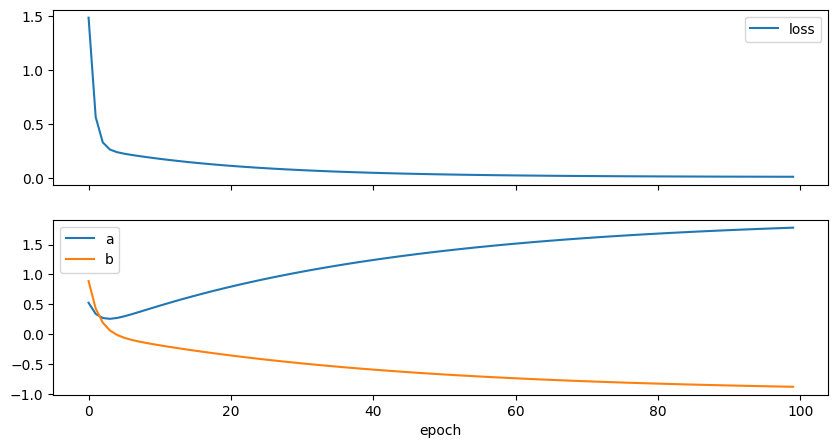

In [17]:
fig, axs = plt.subplots(2,1, figsize = (10,5), sharex= True)
axs[0].plot(history['loss'], label = 'loss')
axs[0].legend()
axs[1].plot([p[0]for p in history['parameters']], label='a')
axs[1].plot([p[1]for p in history['parameters']], label='b')
axs[1].legend()
axs[1].set_xlabel('epoch')
plt.show()

También se pueden utilizar optimizadores incluidos en la librería nn, lo que hace scripts mas compactos

In [18]:
regresor = LinReg() # creamos un modelo nuevo para empezar de cero
criterion = torch.nn.MSELoss(reduction='mean') # Usamos la misma que en el tema anterior
# Tambien hay que definir un optimizador (habiamos usado descenso por gradientes)
optimizer = torch.optim.SGD(regresor.parameters(),lr = 0.2) # vamos a utilizar stochastic gradient descent

In [19]:
# Entrenamiento
history = {'loss':[], 'parameters': []}
for epoch in range(100):  # loop over the dataset multiple times
    y_pred = regresor(x_train)      # Calculo los valores que predice el modelo
    loss = criterion(y_pred, y_train) # calculo el loss para esos valores
    history['loss'].append(loss.item())     # guardo la historia para dibujar
    history['parameters'].append([p.item() for p  in regresor.parameters()])

    optimizer.zero_grad()   # pongo en cero los gradientes usando el método del optimizador      
    
    loss.backward()         # calculo las derivadas (backpropagation)
    
    # Actualizo los parametros
    optimizer.step()

    if epoch %10 ==0:
        print(f'epoch: {epoch}/100 ---> loss: {loss}')

epoch: 0/100 ---> loss: 0.15544147789478302
epoch: 10/100 ---> loss: 0.08162477612495422
epoch: 20/100 ---> loss: 0.05382099002599716
epoch: 30/100 ---> loss: 0.03675489127635956
epoch: 40/100 ---> loss: 0.0262796338647604
epoch: 50/100 ---> loss: 0.019849855452775955
epoch: 60/100 ---> loss: 0.01590321958065033
epoch: 70/100 ---> loss: 0.013480768539011478
epoch: 80/100 ---> loss: 0.011993843130767345
epoch: 90/100 ---> loss: 0.011081159114837646


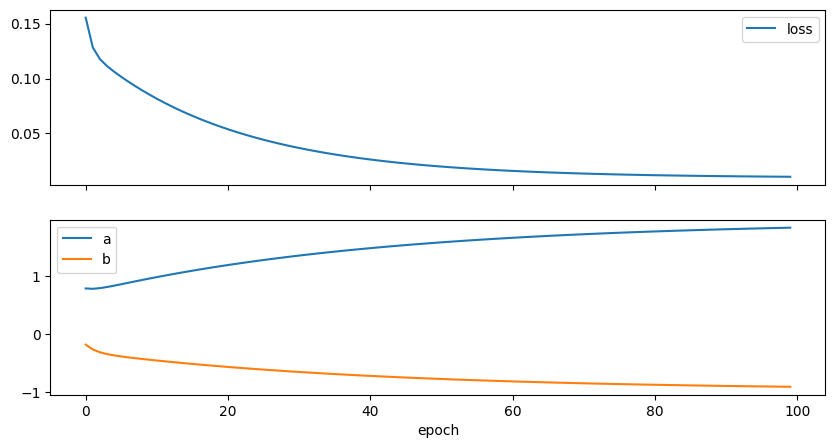

In [20]:
fig, axs = plt.subplots(2,1, figsize = (10,5), sharex= True)
axs[0].plot(history['loss'], label = 'loss')
axs[0].legend()
axs[1].plot([p[0]for p in history['parameters']], label='a')
axs[1].plot([p[1]for p in history['parameters']], label='b')
axs[1].legend()
axs[1].set_xlabel('epoch')
plt.show()

Como se ha utilizado un optimizador SGD al tomar cierta aleatoriedad para evitar minimmos locales la convergencia es más lenta

## Explorando optimizadores
se pueden utilizar diversos optimizadores y funciones de perdida

In [21]:
modelo = LinReg()
criterion= torch.nn.MSELoss()
optimizer = torch.optim.Adam(modelo.parameters(), lr = 0.2)        
history = {'loss':[], 'parameters': []}

for epoch in range(100):  # loop over the dataset multiple times
    y_pred = modelo(x_train)      # Calculo los valores que predice el modelo
    loss = criterion(y_pred, y_train) # calculo el loss para esos valores
    history['loss'].append(loss.item())     # guardo la historia para dibujar
    history['parameters'].append([p.item() for p  in modelo.parameters()])

    optimizer.zero_grad()   # pongo en cero los gradientes usando el método del optimizador      
    
    loss.backward()         # calculo las derivadas (backpropagation)
    
    # Actualizo los parametros
    optimizer.step()

    if epoch %10 ==0:
        print(f'epoch: {epoch}/100 ---> loss: {loss.item()}')

print(f'Adam optimizer:')
print('---------------')
print(modelo.linear.weight.item(), modelo.linear.bias.item())

epoch: 0/100 ---> loss: 0.6201119422912598
epoch: 10/100 ---> loss: 0.13158531486988068
epoch: 20/100 ---> loss: 0.028004353865981102
epoch: 30/100 ---> loss: 0.015680165961384773
epoch: 40/100 ---> loss: 0.015937453135848045
epoch: 50/100 ---> loss: 0.010688274167478085
epoch: 60/100 ---> loss: 0.009941325522959232
epoch: 70/100 ---> loss: 0.009906686842441559
epoch: 80/100 ---> loss: 0.00966677162796259
epoch: 90/100 ---> loss: 0.009662801399827003
Adam optimizer:
---------------
1.9613536596298218 -0.9752987027168274


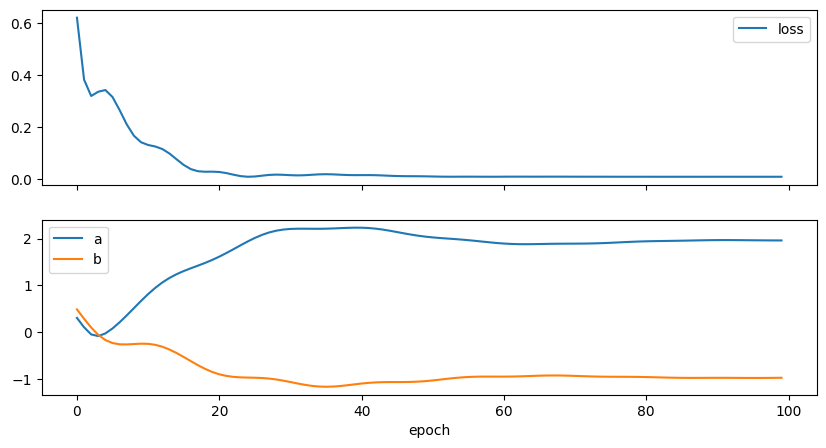

In [22]:
fig, axs = plt.subplots(2,1, figsize = (10,5), sharex= True)
axs[0].plot(history['loss'], label = 'loss')
axs[0].legend()
axs[1].plot([p[0]for p in history['parameters']], label='a')
axs[1].plot([p[1]for p in history['parameters']], label='b')
axs[1].legend()
axs[1].set_xlabel('epoch')
plt.show()